   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


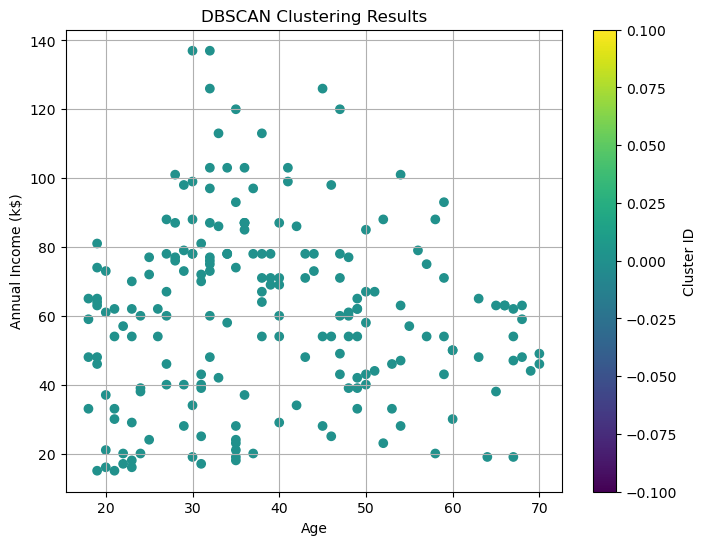

Number of clusters: 1
Number of noise points: 0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Inspect the data to see column names and types
print(data.head())
print(data.dtypes)

# Drop the 'CustomerID' column as it's not needed for clustering
data_cleaned = data.drop(columns=['CustomerID'])

# Convert categorical columns (like 'Gender') to numeric using LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

# For DBSCAN, it's important to scale the features for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Perform DBSCAN clustering with eps=3, min_samples=4, and metric='euclidean'
dbscan = DBSCAN(eps=3, min_samples=4, metric='euclidean')
labels = dbscan.fit_predict(data_scaled)

# Add the labels to the dataset for visualization
data_cleaned['Cluster'] = labels

# Visualize the clustering results (use 2D projection for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Age'], data_cleaned['Annual Income (k$)'], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()

# Print the number of clusters found
print(f"Number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")  # -1 indicates noise points

# Check the number of noise points (labeled as -1)
print(f"Number of noise points: {(labels == -1).sum()}")


Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
Number of clusters (excluding noise): 1
Labels distribution: 0    200
Name: count, dtype: int64


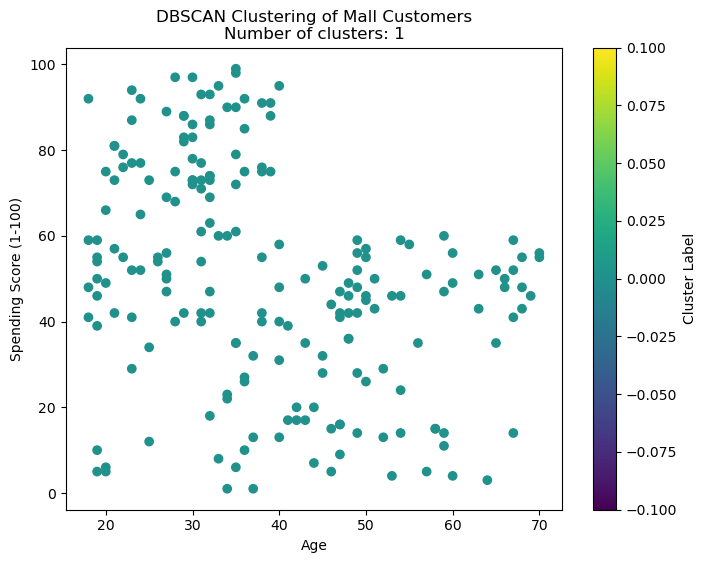

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Drop 'CustomerID' as it's not relevant for clustering
data_cleaned = data.drop(columns=['CustomerID'])

# Check the column types and ensure no non-numeric columns are involved in DBSCAN
print(data_cleaned.dtypes)

# Handle missing values if any (DBSCAN requires no missing values in the features)
data_cleaned = data_cleaned.dropna()

# Scale the data (important for DBSCAN, as it uses distances)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Perform DBSCAN clustering with eps=3, min_samples=4, and metric='euclidean'
dbscan = DBSCAN(eps=3, min_samples=4, metric='euclidean')
labels = dbscan.fit_predict(data_scaled)

# Add the labels (cluster assignments) to the original data
data_cleaned['Cluster'] = labels

# Check the number of clusters (excluding noise points labeled as -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", num_clusters)
print("Labels distribution:", pd.Series(labels).value_counts())

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['Age'], data_cleaned['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.title(f'DBSCAN Clustering of Mall Customers\nNumber of clusters: {num_clusters}')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster Label')
plt.show()
